In [1]:
import numpy as np
import matplotlib.pyplot as graph
import seaborn as sns

graph.style.use('fivethirtyeight')

### Birthday problem

The probability of observing two individuals with a birthday on the same day

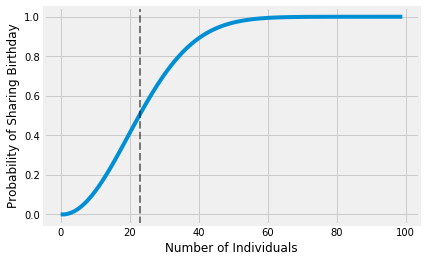

In [2]:
def get_prob_of_sharing(n_individuals, n_days_in_year=365):
    n_ways_of_not_sharing = 1 
    for i in range(n_individuals):
        n_ways_of_not_sharing *= (n_days_in_year - i)
    
    n_total_ways = n_days_in_year ** n_individuals
    n_ways_of_sharing = n_total_ways - n_ways_of_not_sharing
    
    return n_ways_of_sharing / n_total_ways

data = np.array([get_prob_of_sharing(n_individuals) for n_individuals in range(100)])

graph.plot(data)
graph.xlabel('Number of Individuals')
graph.ylabel('Probability of Sharing Birthday')
graph.axvline(np.argmax(data > 0.5), alpha=0.5, linestyle='dashed', color='black', linewidth=2)
graph.show()

## Fixed Points

A fixed point is when an object returns to its original place after a permutation

What is the distribution of number of fixed points after a permutation?

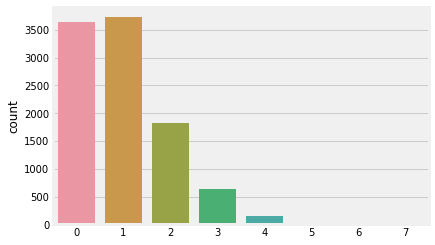

In [3]:
data = np.arange(100)
iterations = range(10000)

def get_n_fixed_points(data, permuted_data):
    return sum(1 for idx, value in enumerate(permuted_data) if value == data[idx])
    
fixed_points = []
for iteration in iterations:
    permuted_data = np.random.permutation(data)
    
    n_fixed = get_n_fixed_points(data, permuted_data)
    fixed_points.append(n_fixed)

sns.countplot(fixed_points)
graph.show()

## Record Breaking

If a measurement is taken in succession for n number of times what is the distribution of number of records broken?

let the set of the ranks of the measurement be $\sigma$ = {1, 2, ... , n}.  
After a permutation of the set the i'th measurement is a record if i = 1 or $\sigma$(j) < $\sigma$(i) for every j = 1, ... , i-1

In other words the i'th measurement is a record if its value is larger than all the values before it

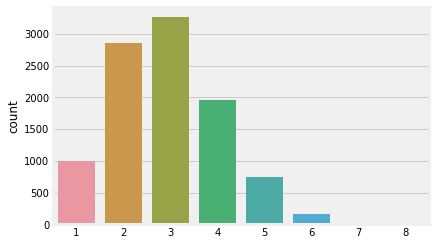

In [4]:
data = range(10)
def get_n_records_broken(data):
    permuted = np.random.permutation(data)
    records_broken = 0
    max_val = -1

    for i in permuted:
        if i > max_val:
            records_broken += 1
            max_val = i
        
    return records_broken

n_iterations = 10000
records_broken = [get_n_records_broken(data) for iteration in range(n_iterations)]

sns.countplot(records_broken)
graph.show()